In [4]:
import pandas as pd

# Specify the path to your dataset
file_path = '/kaggle/input/sample-project/MSCAD (1).csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   'Flow Duration'  'Tot Fwd Pkts'  'Tot Bwd Pkts'  'TotLen Fwd Pkts'  \
0             1518               2               5                110   
1             5894               4               8                168   
2              272               1               1                  0   
3             2611               4               8                322   
4              294               1               1                  0   

   'TotLen Bwd Pkts'  'Fwd Pkt Len Max'  'Fwd Pkt Len Min'  \
0                377                110                  0   
1               4498                168                  0   
2                  0                  0                  0   
3               4434                322                  0   
4                  0                  0                  0   

   'Fwd Pkt Len Mean'  'Fwd Pkt Len Std'  'Bwd Pkt Len Max'  ...  \
0                55.0            77.7817                377  ...   
1                42.0            84.0000            

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, recall_score, precision_score
import pickle

In [6]:
!pip show imbalanced-learn
!pip show xgboost


Name: imbalanced-learn
Version: 0.12.4
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: TPOT


In [7]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb


In [8]:
data1 = pd.DataFrame(data)
data1.describe()



,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min'
count,1.287990e+05,128799.000000,128799.000000,1.287990e+05,1.287990e+05,128799.000000,128799.000000,128799.000000,128799.000000,128799.000000,...,128799.000000,128799.000000,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05
mean,1.211434e+07,32.137959,17.094845,2.857377e+04,5.774828e+03,154.251695,19.660137,55.290373,65.647581,561.156073,...,1672.963175,26.641061,5.065479e+05,1.671700e+05,6.843067e+05,3.665977e+05,3.319407e+06,2.707912e+05,3.522649e+06,3.078633e+06
std,3.313302e+07,1520.942030,638.085907,2.053612e+06,6.522189e+05,285.115280,90.359819,110.086964,115.025425,687.521491,...,4776.939209,1515.541208,4.275231e+06,1.868728e+06,5.379069e+06,3.818159e+06,1.292889e+07,2.487136e+06,1.348547e+07,1.254057e+07
min,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.085500e+03,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.609000e+03,2.000000,1.000000,3.300000e+01,2.000000e+01,20.000000,0.000000,20.000000,0.000000,20.000000,...,54.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.230700e+04,4.000000,8.000000,3.200000e+02,4.434000e+03,318.000000,0.000000,79.750000,159.000000,1460.000000,...,4106.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,138705.000000,157544.000000,1.880454e+08,2.136112e+08,63732.000000,1460.000000,13808.485700,23605.095200,4164.000000,...,65535.000000,138705.000000,1.131062e+08,7.025067e+07,1.131062e+08,1.131062e+08,1.199988e+08,6.159200e+07,1.199988e+08,1.199988e+08


In [9]:
column_names = data1.columns


data1.describe()


,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min'
count,1.287990e+05,128799.000000,128799.000000,1.287990e+05,1.287990e+05,128799.000000,128799.000000,128799.000000,128799.000000,128799.000000,...,128799.000000,128799.000000,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05,1.287990e+05
mean,1.211434e+07,32.137959,17.094845,2.857377e+04,5.774828e+03,154.251695,19.660137,55.290373,65.647581,561.156073,...,1672.963175,26.641061,5.065479e+05,1.671700e+05,6.843067e+05,3.665977e+05,3.319407e+06,2.707912e+05,3.522649e+06,3.078633e+06
std,3.313302e+07,1520.942030,638.085907,2.053612e+06,6.522189e+05,285.115280,90.359819,110.086964,115.025425,687.521491,...,4776.939209,1515.541208,4.275231e+06,1.868728e+06,5.379069e+06,3.818159e+06,1.292889e+07,2.487136e+06,1.348547e+07,1.254057e+07
min,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.085500e+03,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.609000e+03,2.000000,1.000000,3.300000e+01,2.000000e+01,20.000000,0.000000,20.000000,0.000000,20.000000,...,54.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.230700e+04,4.000000,8.000000,3.200000e+02,4.434000e+03,318.000000,0.000000,79.750000,159.000000,1460.000000,...,4106.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,138705.000000,157544.000000,1.880454e+08,2.136112e+08,63732.000000,1460.000000,13808.485700,23605.095200,4164.000000,...,65535.000000,138705.000000,1.131062e+08,7.025067e+07,1.131062e+08,1.131062e+08,1.199988e+08,6.159200e+07,1.199988e+08,1.199988e+08


In [10]:
y = data1['y']
y1= data1['Label']
data = data1.drop(['y','Label'],axis=1)

In [11]:
data


,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min'
0,1518,2,5,110,377,110,0,55.0000,77.7817,377,...,46,1,0,0,0,0,0,0,0,0
1,5894,4,8,168,4498,168,0,42.0000,84.0000,1460,...,54,1,0,0,0,0,0,0,0,0
2,272,1,1,0,0,0,0,0.0000,0.0000,0,...,4106,0,0,0,0,0,0,0,0,0
3,2611,4,8,322,4434,322,0,80.5000,161.0000,1460,...,54,1,0,0,0,0,0,0,0,0
4,294,1,1,0,0,0,0,0.0000,0.0000,0,...,4106,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128794,68942,3,2,517,0,517,0,172.3333,298.4901,0,...,65535,1,0,0,0,0,0,0,0,0
128795,63327,2,2,1277,1356,1277,0,638.5000,902.9754,1356,...,0,1,0,0,0,0,0,0,0,0
128796,139061,3,3,517,0,517,0,172.3333,298.4901,0,...,261,1,0,0,0,0,0,0,0,0
128797,21641848,2,5,0,1,0,0,0.0000,0.0000,1,...,257,0,3242118,0,3242118,3242118,10100000,0,10100000,10100000


In [12]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(data, y1, test_size=0.3, random_state=42)

# since the dataset is imbalance applying smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [13]:
X_resampled.shape


(371178, 66)

In [14]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def train_models(pipeline, name):
    """
    Train a machine learning pipeline, evaluate its performance, and display metrics.

    Args:
        pipeline: A sklearn pipeline with steps for preprocessing and a classifier.
        name: Name of the pipeline or model being trained.

    Returns:
        metrics: A dictionary containing Accuracy, Precision, Recall, F1-Score, FPR, and AUC-ROC.
        pipeline: The trained pipeline.
    """
    metrics = {}

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test) if hasattr(pipeline.named_steps['classifier'], "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_test, y_pred, average='weighted') * 100  # Convert to percentage
    recall = recall_score(y_test, y_pred, average='weighted') * 100  # Convert to percentage
    f1 = f1_score(y_test, y_pred, average='weighted') * 100  # Convert to percentage

    # Calculate overall FPR
    cm = confusion_matrix(y_test, y_pred)
    total_samples = np.sum(cm)
    false_positives = np.sum(cm, axis=0) - np.diag(cm)
    true_negatives = total_samples - (np.sum(cm, axis=1) + false_positives)
    overall_fpr = np.sum(false_positives) / (np.sum(false_positives) + np.sum(true_negatives)) * 100  # Percentage

   
    # Round metrics to 4 decimal places
    metrics[name] = {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'Overall FPR': round(overall_fpr, 4)
    }

    # Print metrics
    print(f"Metrics for {name}:")
    print(f"Accuracy: {metrics[name]['Accuracy']}%")
    print(f"Precision: {metrics[name]['Precision']}%")
    print(f"Recall: {metrics[name]['Recall']}%")
    print(f"F1-Score: {metrics[name]['F1-Score']}%")
    print(f"Overall FPR: {metrics[name]['Overall FPR']}%")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))  # Adjusted to 4 decimal places

    # Plot confusion matrix
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=pipeline.named_steps['classifier'].classes_,
        yticklabels=pipeline.named_steps['classifier'].classes_
    )
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    return metrics, pipeline


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: 98.8173%
Precision: 98.8065%
Recall: 98.8173%
F1-Score: 98.8068%
Overall FPR: 0.2365%

Classification Report:
              precision    recall  f1-score   support

 Brute_Force     0.9914    0.9989    0.9952     26639
   HTTP_DDoS     0.8673    0.9290    0.8971       183
  ICMP_Flood     1.0000    0.6923    0.8182        13
      Normal     0.9835    0.9706    0.9770      8476
   Port_Scan     0.9811    0.9531    0.9669      3323
 Web_Crwling     0.0000    0.0000    0.0000         6

    accuracy                         0.9882     38640
   macro avg     0.8039    0.7573    0.7757     38640
weighted avg     0.9881    0.9882    0.9881     38640



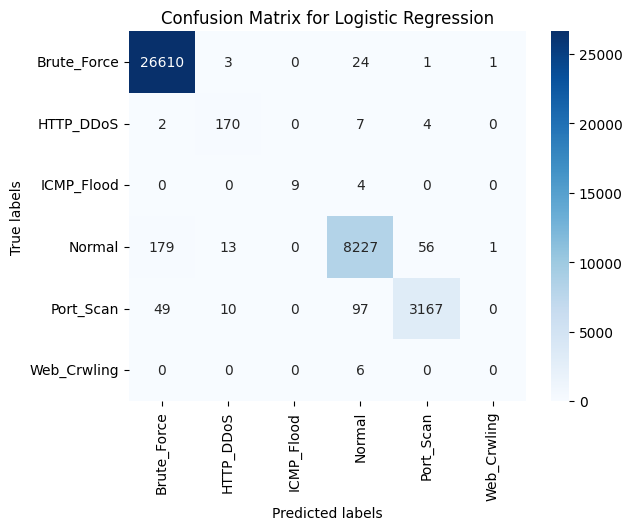

In [15]:
#logistic_regression
logistic_clf1 = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
])

logistic_metrics, logistic_model = train_models(logistic_clf1, "Logistic Regression")

#filename = 'test_logistc_model.pkl'
#pickle.dump(logistic_model, open(filename, 'wb'))

# load the model
#load_model = pickle.load(open(filename, 'rb'))

#y_pred = load_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for svc_model:
Accuracy: 99.3271%
Precision: 99.313%
Recall: 99.3271%
F1-Score: 99.3146%
Overall FPR: 0.1346%

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Brute_Force     0.9964    0.9996    0.9980     26639
   HTTP_DDoS     0.9438    0.9180    0.9307       183
  ICMP_Flood     1.0000    0.6923    0.8182        13
      Normal     0.9835    0.9916    0.9875      8476
   Port_Scan     0.9956    0.9537    0.9742      3323
 Web_Crwling     0.0000    0.0000    0.0000         6

    accuracy                         0.9933     38640
   macro avg     0.8199    0.7592    0.7848     38640
weighted avg     0.9931    0.9933    0.9931     38640



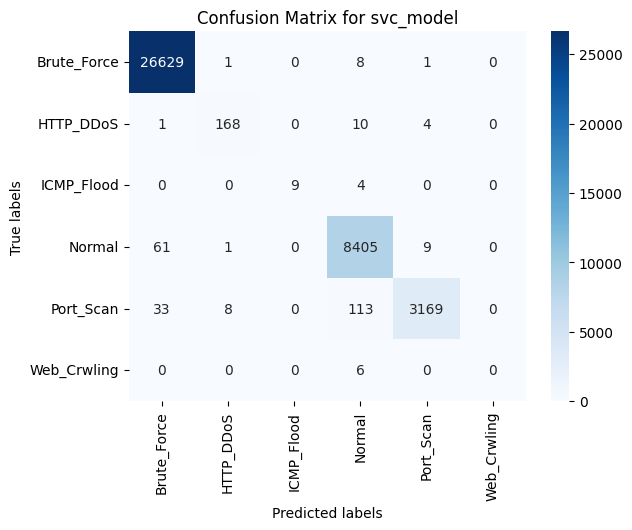

In [16]:
#SVC
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])


svc_metrics , svc_model=train_models(svc_clf , "svc_model")

#filename1 = 'test_svc_model.pkl'
#pickle.dump(svc_clf, open(filename1, 'wb'))

# load the model
#load_model = pickle.load(open(filename1, 'rb'))

#y_pred = load_model.predict(X_test)

Metrics for decsion_tree:
Accuracy: 99.7981%
Precision: 99.8011%
Recall: 99.7981%
F1-Score: 99.7994%
Overall FPR: 0.0404%

Classification Report:
              precision    recall  f1-score   support

 Brute_Force     0.9998    0.9997    0.9998     26639
   HTTP_DDoS     0.9665    0.9454    0.9558       183
  ICMP_Flood     0.7500    0.6923    0.7200        13
      Normal     0.9963    0.9963    0.9963      8476
   Port_Scan     0.9922    0.9934    0.9928      3323
 Web_Crwling     0.2500    0.3333    0.2857         6

    accuracy                         0.9980     38640
   macro avg     0.8258    0.8267    0.8251     38640
weighted avg     0.9980    0.9980    0.9980     38640



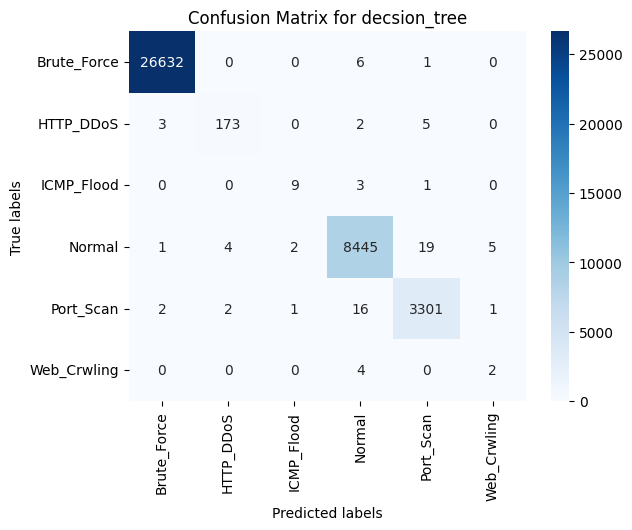

In [17]:
decision_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
        ])

decision_metrics , decision_model = train_models(decision_clf , "decsion_tree")
#filename2 = 'test_decision_tree.pkl'
#pickle.dump(decision_model, open(filename2, 'wb'))

# load the model
# load_model = pickle.load(open(filename2, 'rb'))

# y_pred = load_model.predict(X_test)


Metrics for Random_Forest:
Accuracy: 99.8007%
Precision: 99.7996%
Recall: 99.8007%
F1-Score: 99.7951%
Overall FPR: 0.0399%

Classification Report:
              precision    recall  f1-score   support

 Brute_Force     0.9991    0.9996    0.9993     26639
   HTTP_DDoS     0.9558    0.9454    0.9505       183
  ICMP_Flood     0.8182    0.6923    0.7500        13
      Normal     0.9962    0.9991    0.9976      8476
   Port_Scan     0.9970    0.9880    0.9924      3323
 Web_Crwling     1.0000    0.1667    0.2857         6

    accuracy                         0.9980     38640
   macro avg     0.9610    0.7985    0.8293     38640
weighted avg     0.9980    0.9980    0.9980     38640



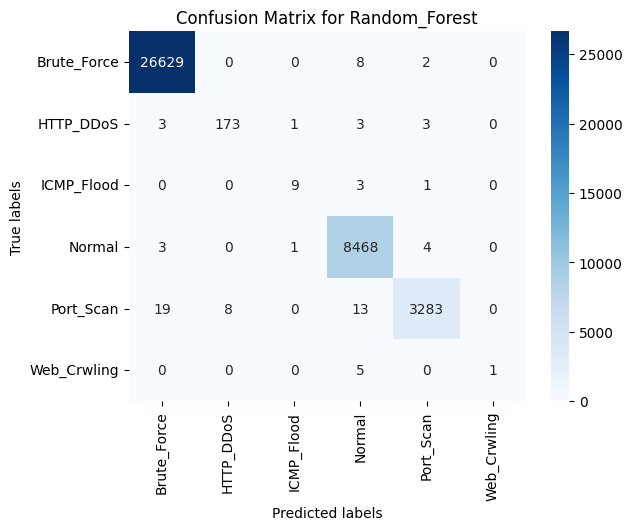

In [18]:
random_clf =Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])


randmon_metrics , random_model = train_models(random_clf , "Random_Forest")
#filename = 'test_random_model.pkl'
#pickle.dump(random_model, open(filename, 'wb'))


Metrics for Gradient_Boosting_Classifier:
Accuracy: 99.749%
Precision: 99.7471%
Recall: 99.749%
F1-Score: 99.7478%
Overall FPR: 0.0502%

Classification Report:
              precision    recall  f1-score   support

 Brute_Force     0.9994    0.9996    0.9995     26639
   HTTP_DDoS     0.9326    0.9071    0.9197       183
  ICMP_Flood     0.8182    0.6923    0.7500        13
      Normal     0.9953    0.9966    0.9959      8476
   Port_Scan     0.9934    0.9904    0.9919      3323
 Web_Crwling     0.1667    0.1667    0.1667         6

    accuracy                         0.9975     38640
   macro avg     0.8176    0.7921    0.8039     38640
weighted avg     0.9975    0.9975    0.9975     38640



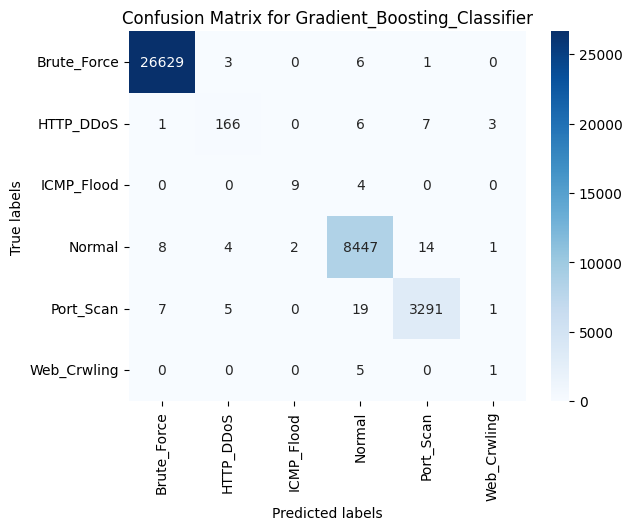

In [19]:

gd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])
gd_metrics , gd_boost = train_models(gd_clf, "Gradient_Boosting_Classifier")

#filename = 'test_gd_boost.pkl'
#pickle.dump(gd_boost , open(filename, 'wb'))

Metrics for XGB Classifier:
Accuracy: 99.2365%
Precision: 99.7373%
Recall: 99.2365%
F1-Score: 99.4832%
Overall FPR: 0.1527%

Classification Report:
              precision    recall  f1-score   support

 Brute_Force     0.9992    0.9996    0.9994     26639
   HTTP_DDoS     0.9274    0.9071    0.9171       183
  ICMP_Flood     0.7500    0.6923    0.7200        13
      Normal     0.9949    0.9743    0.9845      8476
   Port_Scan     0.9952    0.9880    0.9915      3323
 Web_Crwling     0.0050    0.1667    0.0096         6

    accuracy                         0.9924     38640
   macro avg     0.7786    0.7880    0.7704     38640
weighted avg     0.9974    0.9924    0.9948     38640



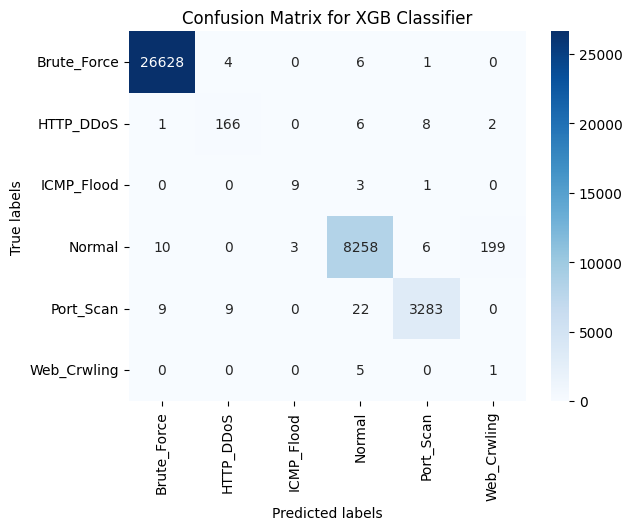

In [20]:
xgb_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])
xgb_metrics , xgb_model = train_models(gd_clf, "XGB Classifier")

#filename = 'xgb_boost_logistic.pkl'
#pickle.dump(xgb_model , open(filename, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Voting Model (Bagging + XGBoost):
Accuracy: 99.8577%
Precision: 99.8411%
Recall: 99.8577%
F1-Score: 99.8488%
Overall FPR: 0.0285%

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Brute_Force     0.9998    0.9997    0.9997     26639
   HTTP_DDoS     0.9609    0.9399    0.9503       183
  ICMP_Flood     0.9000    0.6923    0.7826        13
      Normal     0.9965    0.9991    0.9978      8476
   Port_Scan     0.9967    0.9946    0.9956      3323
 Web_Crwling     0.0000    0.0000    0.0000         6

    accuracy                         0.9986     38640
   macro avg     0.8090    0.7709    0.7877     38640
weighted avg     0.9984    0.9986    0.9985     38640



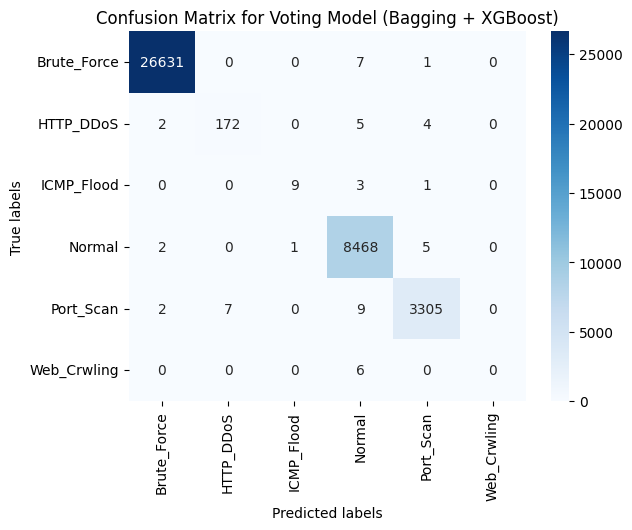

In [24]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define base classifiers for Bagging and XGBoost
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50, random_state=42
)

xgboost_clf = XGBClassifier(
    n_estimators=100, learning_rate=0.1, random_state=42
)

# Define the Voting model
voting_clf = VotingClassifier(
    estimators=[
        ('bagging', bagging_clf),
        ('xgboost', xgboost_clf)
    ],
    voting='soft'  # Soft voting: Uses predicted probabilities for class decision
)  # <- Closing parenthesis added here

# Define the pipeline with scaling and the voting model
voting_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', voting_clf)   # Voting model (Bagging + XGBoost)
])  # <- Closing bracket corrected here

# Train and evaluate the Voting Model
voting_metrics, voting_model = train_models(voting_pipeline, "Voting Model (Bagging + XGBoost)")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Metrics for Stacking Model (Bagging + XGBoost):
Accuracy: 99.8784%
Precision: 99.8627%
Recall: 99.8784%
F1-Score: 99.8692%
Overall FPR: 0.0243%

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Brute_Force     0.9998    0.9997    0.9998     26639
   HTTP_DDoS     0.9884    0.9344    0.9607       183
  ICMP_Flood     1.0000    0.6923    0.8182        13
      Normal     0.9971    0.9991    0.9981      8476
   Port_Scan     0.9955    0.9970    0.9962      3323
 Web_Crwling     0.0000    0.0000    0.0000         6

    accuracy                         0.9988     38640
   macro avg     0.8301    0.7704    0.7955     38640
weighted avg     0.9986    0.9988    0.9987     38640



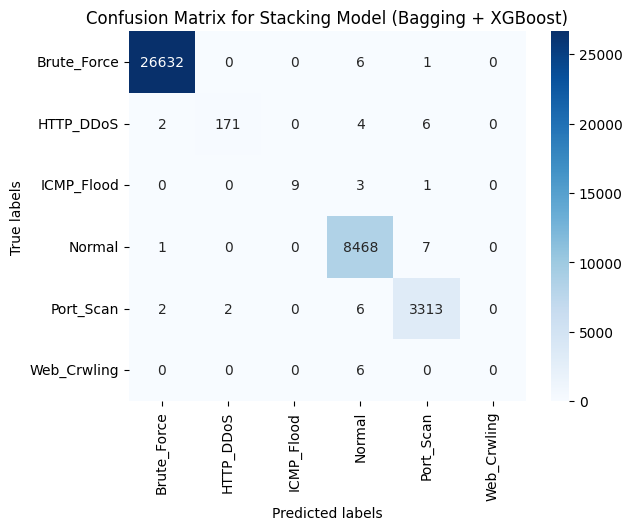

In [21]:
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50, random_state=42
)

xgboost_clf = XGBClassifier(
    n_estimators=100, learning_rate=0.1, random_state=42
)

# Define the Stacking model
stacking_clf = StackingClassifier(
    estimators=[
        ('bagging', bagging_clf),
        ('xgboost', xgboost_clf)
    ],
    final_estimator=LogisticRegression(),  # Meta-learner
    stack_method='auto',
    passthrough=False  # Use base models' predictions as input to meta-learner
)

# Define the pipeline with scaling and the stacking model
stacking_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', stacking_clf)   # Stacking model (Bagging + XGBoost)
])

# Train and evaluate the Stacking Model
stacking_metrics, stacking_model = train_models(stacking_pipeline, "Stacking Model (Bagging + XGBoost)")




In [ ]:
import matplotlib.pyplot as plt

# Example data
models = ['LR', 'SVC', 'DTC', 'RFC', 'GBC', 'XGBC', 'Bagging', 'Stacking']
accuracy = [98.82, 99.33, 99.81, 99.81, 99.75, 99.75, 99.86, 99.88]
precision = [98.81, 99.31, 99.81, 99.8, 99.75, 99.75, 99.84, 99.86]
recall = [98.81, 99.33, 99.81, 99.81, 99.75, 99.75, 99.86, 99.88]
f1_score = [98.81, 99.31, 99.81, 99.8, 99.75, 99.75, 99.85, 99.87]

# Assign colors for ML and Ensemble models
ml_color = '#FF6347'  # Tomato (for traditional ML models)
ensemble_color = '#FFD700'  # Gold (for ensemble models)
model_colors = [ml_color] * 3 + [ensemble_color] * 5  # First 3 are ML, last 5 are Ensemble

# Plot settings
plt.figure(figsize=(12, 6), facecolor='black')
ax = plt.gca()  # Get current axes
ax.set_facecolor('black')  # Set background color to black

# Highlight ML and Ensemble model groups with colored bars
bar_height = 0.05  # Small visible height for the bars
for i, model in enumerate(models):
    plt.bar(model, bar_height, color=model_colors[i], alpha=0.4, zorder=0)

# Plot lines with markers
plt.plot(models, accuracy, marker='o', color='lime', label='Accuracy', linewidth=2, markersize=8)  # Neon lime
plt.plot(models, precision, marker='o', color='magenta', label='Precision', linewidth=2, markersize=8)  # Neon magenta
plt.plot(models, recall, marker='o', color='deepskyblue', label='Recall', linewidth=2, markersize=8)  # Neon blue
plt.plot(models, f1_score, marker='o', color='red', label='F1 Score', linewidth=2, markersize=8)  # Neon red

# Customize graph
plt.ylim(98, 100)  # Adjust y-axis range
plt.title('Performance Metrics Across ML and Ensemble Models', fontsize=18, color='white', fontweight='bold')
plt.xlabel('Models', fontsize=18, color='white', fontweight='bold')
plt.ylabel('Percentage', fontsize=18, color='white', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4, color='gray')  # Grid in gray for visibility

# Adjust legend
plt.legend(fontsize=12, facecolor='black', edgecolor='white', labelcolor='white', loc='lower right')

# Make model names bold and larger
plt.xticks(fontsize=14, fontweight='bold', color='white')

# Make percentage values (y-axis) bold and larger
plt.yticks(fontsize=14, fontweight='bold', color='white')

plt.tick_params(colors='white')  # Change tick colors to white

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example data
models = ['LR', 'SVC', 'DTC', 'RFC', 'GBC', 'XGBC', 'Bagging', 'Stacking']
accuracy = [98.82, 99.33, 99.81, 99.81, 99.75, 99.75, 99.86, 99.88]
precision = [98.81, 99.31, 99.81, 99.8, 99.75, 99.75, 99.84, 99.86]
recall = [98.81, 99.33, 99.81, 99.81, 99.75, 99.75, 99.86, 99.88]
f1_score = [98.81, 99.31, 99.81, 99.8, 99.75, 99.75, 99.85, 99.87]

# Assign colors for ML and Ensemble models
ml_color = '#F08080'  # Light coral
ensemble_color = '#EEE8AA'  # Pale goldenrod
model_colors = [ml_color] * 3 + [ensemble_color] * 6  # First 3 are ML, last 6 are Ensemble

# Plot settings
plt.figure(figsize=(12, 6), facecolor='white')
ax = plt.gca()  # Get current axes
ax.set_facecolor('white')  # Set background color to white

# Highlight ML and Ensemble model groups with colored bars
bar_height = 0.05  # Small visible height for the bars
for i, model in enumerate(models):
    plt.bar(model, bar_height, color=model_colors[i], alpha=0.4, zorder=0)

# Plot lines with markers
plt.plot(models, accuracy, marker='o', color='lime', label='Accuracy')  # Neon lime
plt.plot(models, precision, marker='o', color='magenta', label='Precision')  # Neon magenta
plt.plot(models, recall, marker='o', color='deepskyblue', label='Recall')  # Neon blue
plt.plot(models, f1_score, marker='o', color='red', label='F1 Score')  # Neon red

# Customize graph
plt.ylim(98, 100)  # Adjust y-axis range
plt.title('Performance Metrics Across ML and Ensemble Models', fontsize=18, color='black', fontweight='bold')
plt.xlabel('Models', fontsize=18, color='black', fontweight='bold')
plt.ylabel('Percentage', fontsize=18, color='black', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6, color='black')

# Adjust legend to lower right with bold and larger labels (fontsize=18)
plt.legend(fontsize=44, facecolor='white', edgecolor='black', labelcolor='black', loc='lower right', prop={'weight': 'bold'})

# Make model names bold and larger
plt.xticks(fontsize=18, fontweight='bold', color='black')

# Make percentage values (y-axis) bold and larger
plt.yticks(fontsize=18, fontweight='bold', color='black')

plt.tick_params(colors='black')  # Change tick colors to black

# Adjust layout and display
plt.tight_layout()
plt.show()
